In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

In [7]:
s_dict={}
df=pd.read_csv("winequality-white.csv",sep=';')
df.index=df.index+1
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
c=[]
for j in set(df['quality']):
    c.append(len(df[df['quality']==j]))
c

[20, 163, 1457, 2198, 880, 175, 5]

In [5]:
set(df.quality)

{3, 4, 5, 6, 7, 8, 9}

# Plotting

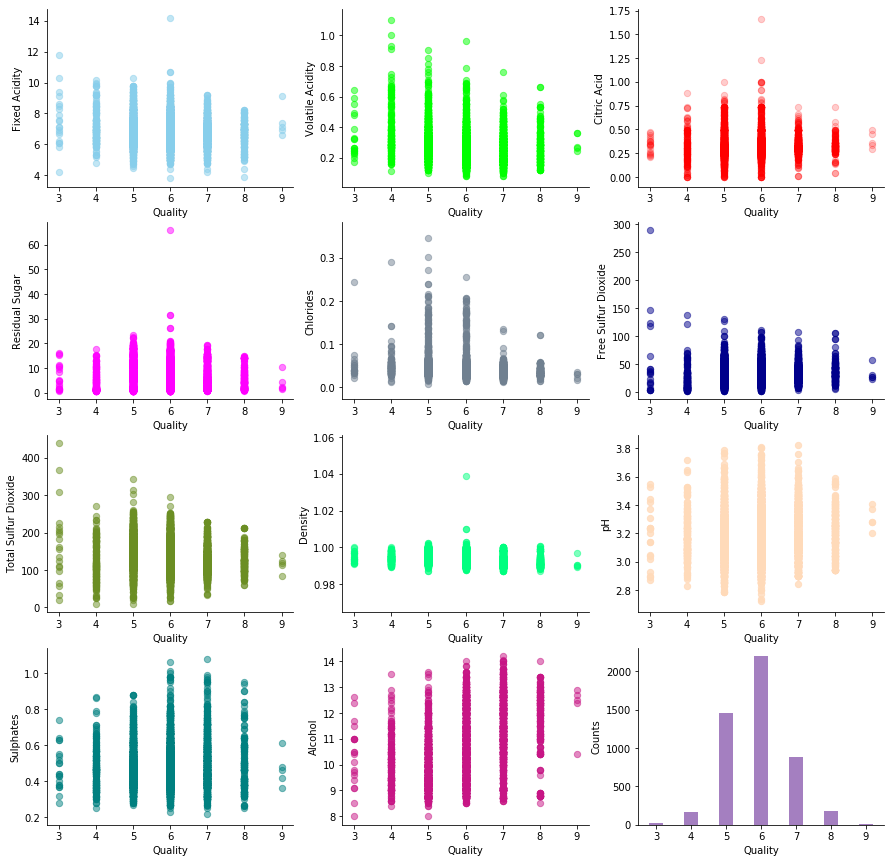

In [11]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12))=plt.subplots(4,3,figsize=(15,15))
sb.despine(top=True)

ax1.scatter(df['quality'],df['fixed acidity'],alpha=0.5,s=40,c='skyblue');
ax1.set_ylabel('Fixed Acidity');
ax1.set_xlabel('Quality');

ax2.scatter(df['quality'],df['volatile acidity'],alpha=0.5,s=40,c='lime');
ax2.set_ylabel('Volatile Acidity');
ax2.set_xlabel('Quality');

ax3.scatter(df['quality'],df['citric acid'],alpha=0.2,s=40,c='r');
ax3.set_ylabel('Citric Acid');
ax3.set_xlabel('Quality');

ax4.scatter(df['quality'],df['residual sugar'],alpha=0.5,s=40,c='fuchsia');
ax4.set_ylabel('Residual Sugar');
ax4.set_xlabel('Quality');

ax5.scatter(df['quality'],df['chlorides'],alpha=0.5,s=40,c='slategray');
ax5.set_ylabel('Chlorides');
ax5.set_xlabel('Quality');

ax6.scatter(df['quality'],df['free sulfur dioxide'],alpha=0.5,s=40,c='darkblue');
ax6.set_ylabel('Free Sulfur Dioxide');
ax6.set_xlabel('Quality');

ax7.scatter(df['quality'],df['total sulfur dioxide'],alpha=0.5,s=40,c='olivedrab');
ax7.set_ylabel('Total Sulfur Dioxide');
ax7.set_xlabel('Quality');

ax8.scatter(df['quality'],df['density'],alpha=0.5,s=40,c='springgreen');
ax8.set_ylabel('Density');
ax8.set_xlabel('Quality');

ax9.scatter(df['quality'],df['pH'],alpha=0.8,s=40,c='peachpuff');
ax9.set_ylabel('pH');
ax9.set_xlabel('Quality');

ax10.scatter(df['quality'],df['sulphates'],alpha=0.5,s=40,c='teal');
ax10.set_ylabel('Sulphates');
ax10.set_xlabel('Quality');

ax11.scatter(df['quality'],df['alcohol'],alpha=0.5,s=40,c='mediumvioletred');
ax11.set_ylabel('Alcohol');
ax11.set_xlabel('Quality');

ax12.bar(list(set(df['quality'])),c,alpha=0.5,color='indigo', width=0.4);
ax12.set_ylabel('Counts');
ax12.set_xlabel('Quality');

# Scaling, Train and Test

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [15]:
y=df.quality
X=df.drop('quality',axis=1)
print(X.head(),'\n',y.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1            7.0              0.27         0.36            20.7      0.045   
2            6.3              0.30         0.34             1.6      0.049   
3            8.1              0.28         0.40             6.9      0.050   
4            7.2              0.23         0.32             8.5      0.058   
5            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1                 45.0                 170.0   1.0010  3.00       0.45   
2                 14.0                 132.0   0.9940  3.30       0.49   
3                 30.0                  97.0   0.9951  3.26       0.44   
4                 47.0                 186.0   0.9956  3.19       0.40   
5                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  
1      8.8  
2      9.5  
3     10.1  
4      9.9  
5      9.9   
 1    6

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
X_train2=MinMaxScaler().fit_transform(X_train)
X_test2=MinMaxScaler().fit_transform(X_test)

### Dummy Classifier

In [111]:
from sklearn.dummy import DummyClassifier
dc=DummyClassifier().fit(X_train,y_train)
dc.score(X_test,y_test)

0.3036734693877551

# Logistic Regression 

In [17]:
from sklearn.linear_model import LogisticRegression

In [32]:
lr=LogisticRegression(C=100,solver='liblinear',max_iter=1000,multi_class='auto').fit(X_train,y_train)
s_dict['Logistic Regression']=lr.score(X_test,y_test)
print(s_dict['Logistic Regression'])
#lr_pred=lr.predict(X_test)
#plt.figure()
#plt.plot(y_test,'-')
#plt.plot(lr_pred, '-x',color='red')

0.52


# Support Vector Machine  

In [33]:
from sklearn.svm import SVC

In [45]:
sv=SVC(kernel='rbf',C=100,gamma='auto').fit(X_train2,y_train)
s_dict['SVM (scaled)']=sv.score(X_test2,y_test)
print(s_dict['SVM (scaled)'])

0.5012244897959184


In [43]:
sv=SVC(kernel='rbf',C=1000,gamma='scale').fit(X_train,y_train)
s_dict['SVM']=sv.score(X_test,y_test)
print(s_dict['SVM'])

0.533895997821944


# Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
dt=DecisionTreeClassifier(max_depth=30,min_samples_leaf=1,random_state=0).fit(X_train,y_train)
s_dict['Decision Tree']=dt.score(X_test,y_test)
print(s_dict['Decision Tree'])

0.5991836734693877


# Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rf=RandomForestClassifier(n_estimators=100,max_depth=30,random_state=0).fit(X_train,y_train)
s_dict['Random Forest']=rf.score(X_test,y_test)
print(s_dict['Random Forest'])

0.6677551020408163


# Gradient Boosting Classifier

In [68]:
from sklearn.ensemble import GradientBoostingClassifier

In [75]:
gb=GradientBoostingClassifier(learning_rate=0.1,max_depth=30,random_state=0).fit(X_train,y_train)
s_dict['Gradient Booster']=gb.score(X_test,y_test)
print(s_dict['Gradient Booster'])

0.6359183673469387


# K Nearest Neighbors

In [92]:
from sklearn.neighbors import KNeighborsClassifier

In [97]:
knn=KNeighborsClassifier(n_neighbors=,algorithm='auto').fit(X_train,y_train)
s_dict['kNN']=knn.score(X_test,y_test)
print(s_dict['kNN'])

0.5444897959183673


In [108]:
knn=KNeighborsClassifier(n_neighbors=50,algorithm='ball_tree').fit(X_train2,y_train)
s_dict['kNN (scaled)']=knn.score(X_test2,y_test)
print(s_dict['kNN (scaled)'])

0.4881632653061225


# Naive Bayes Classifier

In [115]:
from sklearn.naive_bayes import GaussianNB

In [117]:
gnb=GaussianNB().fit(X_train,y_train)
s_dict['NAive Bayes']=gnb.score(X_test,y_test)
print(s_dict['NAive Bayes'])

0.4424489795918367


# Neural Network

In [118]:
from sklearn.neural_network import MLPClassifier

In [132]:
nn=MLPClassifier(hidden_layer_sizes=[50,100,50],activation='tanh',solver='adam',alpha=0.01,max_iter=1000,random_state=0).fit(X_train,y_train)
s_dict['Neural Network']=nn.score(X_test,y_test)
print(s_dict['Neural Network'])

0.5142857142857142


# Score Graph

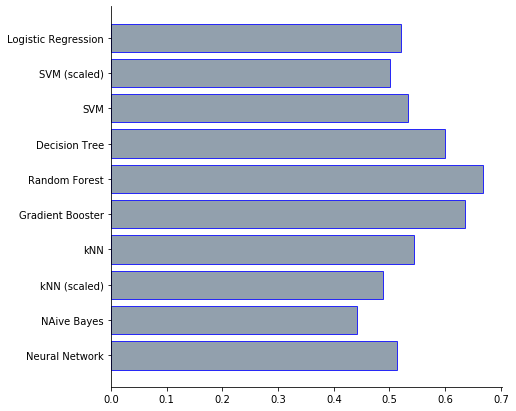

In [136]:
plt.figure(figsize=(7,7))
plt.barh(range(len(s_dict)),list(s_dict.values())[::-1],alpha=0.8,align='center',color='lightslategray',edgecolor='blue')
plt.yticks(ticks=range(len(s_dict)),labels=list(s_dict.keys())[::-1])
sb.despine()
plt.show()

## Best Algorithm

In [141]:
z=max(s_dict.values())
for a,i in s_dict.items():
    if i==z:
        print("Best Algorithm is {} with an accuracy of {}%".format(a,100*z))
        break

Best Algorithm is Random Forest with an accuracy of 66.77551020408163%
